# Project Car Price Predict

In this guided project, you'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 



In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 99



In [2]:
#open data
columns=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 
         'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

cars=pd.read_csv('imports-85.data',names=columns)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Let's determined  which columns are numeric and can be used as features and which column is the target column. The `price` column is target column as we want to predit.


In [4]:
# find numeric columns
numeric_cols=['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 
 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars=cars[numeric_cols].copy()
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


We usually can't have any missing values if we want to use them for predictive modeling. Based on the data set preview from the last step, we can tell that the `normalized-losses` column contains missing values represented using `"?"`. Let's replace these values and look for the presence of missing values in other numeric columns. Let's also rescale the values in the numeric columns so they all range from `0` to `1`.

In [5]:
#replace ? as NaN in normalized-losses columns
numeric_cars=numeric_cars.replace('?', np.nan)

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
#change all the numeric columns type as float
numeric_cars=numeric_cars.astype(float)
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [7]:
# find missing values in data
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [8]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars=numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [9]:
# Replace missing values in other columns using column means.
numeric_cars=numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [10]:
# Normalize all columnns to range from 0 to 1 except the target column.
price=numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price']=price
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.12500,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.12500,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.18750,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.06250,0.313084,0.551020,0.138889,0.157895,17450.0
5,0.298429,0.384840,0.540299,0.512821,0.441667,0.395268,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,15250.0
6,0.486911,0.559767,0.770149,0.948718,0.658333,0.525989,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,17710.0
7,0.298429,0.559767,0.770149,0.948718,0.658333,0.568658,0.283019,0.464286,0.633333,0.09375,0.289720,0.551020,0.166667,0.236842,18920.0
8,0.486911,0.559767,0.770149,0.948718,0.675000,0.619860,0.264151,0.421429,0.633333,0.08125,0.429907,0.551020,0.111111,0.105263,23875.0
10,0.664921,0.425656,0.532836,0.384615,0.541667,0.351823,0.177358,0.685714,0.347619,0.11250,0.247664,0.673469,0.277778,0.342105,16430.0


## Univariate k-nearest neighbors models.

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps us structure your code workflow and understand the features better.

In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#function for knn
def knn_train_test(train_col,target_col,df):
    knn=KNeighborsRegressor()
    
    
    #shuffle the dataframe
    rand_df=df.sample(frac=1,random_state=1)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df=rand_df.iloc[0:int(len(rand_df)/2)]
    test_df=rand_df.iloc[int(len(rand_df)/2):]
    
    # Fit a KNN model using default k value.
    knn.fit(train_df[[train_col]], train_df[target_col])
    
    # Make predictions using model.
    predicted_labels=knn.predict(test_df[[train_col]])
    
    # Calculate and return RMSE.
    mse = mean_squared_error(test_df[target_col], predicted_labels)
    rmse=np.sqrt(mse)
    return rmse

In [12]:
## apply the function to all feature columns
rmse_values={}
for col in numeric_cars.columns[:-1]:
    rmse_val=knn_train_test(col, 'price', numeric_cars)
    rmse_values[col]=rmse_val
rmse_values_series=pd.Series(rmse_values).sort_values()
rmse_values_series

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

We can find in default k value, the engine_size performed the best performace for prediction.

### Various values for k


In [13]:
# modify function for various k
def knn_train_test(train_col,target_col,df):
    #shuffle the dataframe
    rand_df=df.sample(frac=1,random_state=1)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df=rand_df.iloc[0:int(len(rand_df)/2)]
    test_df=rand_df.iloc[int(len(rand_df)/2):]
    
    # various for k
    k_values=[1,3,5,7,9]
    k_rmses={}
    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        
        # Fit a KNN model using default k value.
        knn.fit(train_df[[train_col]], train_df[target_col])
        
        # Make predictions using model.
        predicted_labels=knn.predict(test_df[[train_col]])
    
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse=np.sqrt(mse)
        
        k_rmses[k]=rmse
    return k_rmses
        

In [14]:
#apply the function to all feature columns
k_rmse_results = {}

for col in numeric_cars.columns[:-1]:
    rmse_val = knn_train_test(col, 'price', numeric_cars)
    k_rmse_results[col] = rmse_val
k_rmse_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


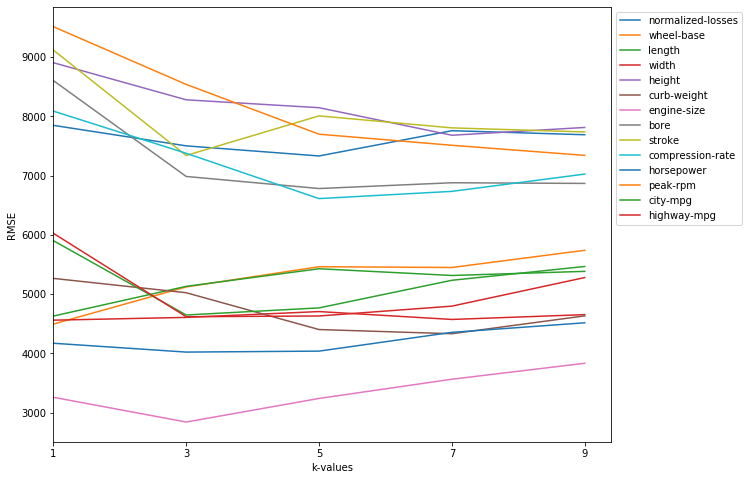

In [15]:
#Visualize the results

import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(10,8))

for k,v in k_rmse_results.items():
    x=list(v.keys())
    y=list(v.values())
   
    

    
    plt.plot(x,y)
    plt.xlabel('k-values')
    plt.ylabel('RMSE')
    plt.xlim(1)
    plt.xticks([1,3,5,7,9])
    plt.legend([k for k in k_rmse_results.keys()],bbox_to_anchor=(1, 1))

plt.show()
   

    
    

As we can see, all of the columns present variations when using different values for k, and most importantly, different k values allow different features to perform better.

## Multivariate Model
When we find best features, we just need to calculate the mean rmse from the last step.

In [16]:
## Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse=np.mean(list(v.values()))
    feature_avg_rmse[k]=avg_rmse

series_avg_rmse=pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
sorted_features=sorted_series_avg_rmse.index

sorted_series_avg_rmse 

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [17]:
sorted_features

Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')

In [18]:
# modify the function
def knn_train_test(train_cols, target_col, df):
    #shuffle the dataframe
    rand_df=df.sample(frac=1,random_state=1)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df=rand_df.iloc[0:int(len(rand_df)/2)]
    test_df=rand_df.iloc[int(len(rand_df)/2):]
    
    k_values=[5]
    k_rmses={}
    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        
        # Fit a KNN model using default k value.
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predictions using model.
        predicted_labels=knn.predict(test_df[train_cols])
    
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse=np.sqrt(mse)
        
        k_rmses[k]=rmse
    return k_rmses


    

In [19]:
#test function
feature_results={}
for n_features in range(2,7):
    result=knn_train_test(sorted_features[:n_features], 'price',numeric_cars)
    feature_results['{} best features'.format(n_features)]=result

feature_results

{'2 best features': {5: 2949.8817277180374},
 '3 best features': {5: 3580.7376651928435},
 '4 best features': {5: 3487.340917327035},
 '5 best features': {5: 3410.2170133901805},
 '6 best features': {5: 3478.510890118539}}

Text(0.5, 0, 'RMSE')

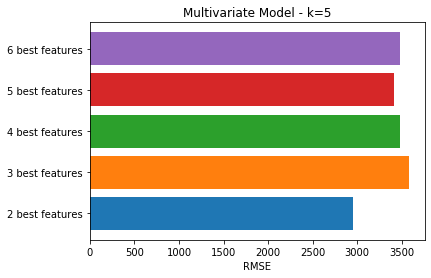

In [20]:
# visualization
plt.figure(figsize=(6,4))
for k, v in feature_results.items():
    plt.barh(k,v[5])
plt.title('Multivariate Model - k=5')
plt.xlabel('RMSE')


## Hyperparameter Tuning
Here we optimize our function in order to allow different values for k and various features, at the same time.
k is from 1-25, the top 3 model is `2 best features`, `5 best features`,`4 best features`

In [21]:
# modify the function
def knn_train_test(train_cols,target_col,df):
    #shuffle the dataframe
    rand_df=df.sample(frac=1,random_state=1)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df=rand_df.iloc[0:int(len(rand_df)/2)]
    test_df=rand_df.iloc[int(len(rand_df)/2):]
    
    k_values=list(range(1,26))
    k_rmses={}
    
    for k in k_values:
        knn=KNeighborsRegressor(n_neighbors=k)
        
        # Fit a KNN model using default k value.
        knn.fit(train_df[train_cols], train_df[target_col])
        
        # Make predictions using model.
        predicted_labels=knn.predict(test_df[train_cols])
    
        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse=np.sqrt(mse)
        
        k_rmses[k]=rmse
    return k_rmses       

In [22]:
#test function
k_rmse_results={}
for n_features in [2,4,5]:
    result=knn_train_test(sorted_features[:n_features],'price',numeric_cars)
    k_rmse_results['{} best features:'.format(n_features)]=result
k_rmse_results

{'2 best features:': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '4 best features:': {1: 2952.725686581471,
  2: 3131.704952720018,
  3: 3129.692821910155,
  4: 3241.4320776448717,
  5: 3487.340917327035,
  6: 3637.0381471429987,
  7: 3606.195077860286,
  8: 3809.9307026308247,
  9: 3875.274902378068,
  10: 3997.1583055842293,
  11: 4162.564050411074,
  12: 4289.486490995821,
  13: 4368.061602779942,
  14: 4416.30477

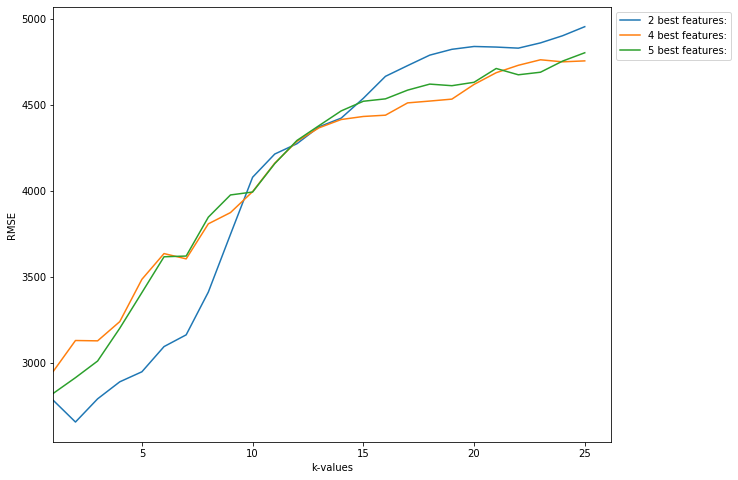

In [23]:
#visulization
fig=plt.figure(figsize=(10,8))
legend=[]
for k,v in k_rmse_results.items():
    x=list(v.keys())
    y=list(v.values())
    legend.append(k)
    
    plt.plot(x,y)
    plt.xlabel('k-values')
    plt.ylabel('RMSE')
    plt.xlim(1)
    plt.legend([k for k in k_rmse_results.keys()],bbox_to_anchor=(1, 1))

plt.show()
    

We can see in the plot that, as we increase the value for k, the error goes down only a little bit right before starting to grow very rapidly.

Since our dataset is pretty small (only 201 entries), bigger values for k make increase rapidly the variance of the model. Therefore, the model will not generalize well outside the training set.

One way to improve the model would be to increase the size of the dataset. Unfortunately, the dataset we are working with is limited.

Another way in which we can improve the performance without adding new data is to perform cross validation. This means dividing the data in a certain amount of folds, choosing one as the test set and the rest as the train sets. We then run several predictions, and for each prediction we switch the fold that acts as test set.

In this case we will divide the data in 10 folds. Also keeping the values of k ranging from 1 to 25.

## k-fold cross validation

In [24]:
from sklearn.model_selection import cross_val_score

## k-fold cross validation
def knn_train_test(train_cols,target_col,df):
    #shuffle the dataframe
    rand_df=df.sample(frac=1,random_state=1)
    
    k_values=list(range(1,26))
    k_rmses={}
    
    for k in k_values:
        # Instatiate model
        knn=KNeighborsRegressor(n_neighbors=k)
        # Using cross_val_score to fit and predict model
        # Output is root_mean_squared_error
        scores=cross_val_score(knn,
                               df[train_cols],
                               df[target_col],
                               cv=10, 
                               scoring='neg_root_mean_squared_error')
        # Take the mean of the results
        rmse=np.mean(np.abs(scores))
        
        k_rmses[k] = rmse
    return k_rmses
    

In [25]:
#test function
k_rmse_results={}
for n_features in [2,4,5]:
    result=knn_train_test(sorted_features[:n_features],'price',numeric_cars)
    k_rmse_results['{} best features:'.format(n_features)]=result
k_rmse_results

{'2 best features:': {1: 3697.683562400446,
  2: 3379.534680353452,
  3: 3390.3319673531487,
  4: 3305.5691716519527,
  5: 3471.518450528392,
  6: 3558.8265107586026,
  7: 3587.899637440483,
  8: 3546.3177553922383,
  9: 3588.573873635794,
  10: 3672.935859364283,
  11: 3716.3777429744114,
  12: 3761.32314397535,
  13: 3832.543942214378,
  14: 3870.642588203208,
  15: 3866.257887552341,
  16: 3913.0161031694015,
  17: 3945.706670683236,
  18: 3951.275154460498,
  19: 3989.2563773741413,
  20: 4018.7926961039966,
  21: 4056.067298501052,
  22: 4123.392568197344,
  23: 4200.869701319565,
  24: 4246.686787623221,
  25: 4282.486059621731},
 '4 best features:': {1: 3628.4942120210353,
  2: 3645.0404477971488,
  3: 3482.8806875718633,
  4: 3568.106642072311,
  5: 3445.5491243990646,
  6: 3471.871321403404,
  7: 3493.2043779908645,
  8: 3549.7861669009462,
  9: 3550.806433863633,
  10: 3570.4814666670995,
  11: 3592.8233871068014,
  12: 3617.2171129681274,
  13: 3652.145219705576,
  14: 3694.

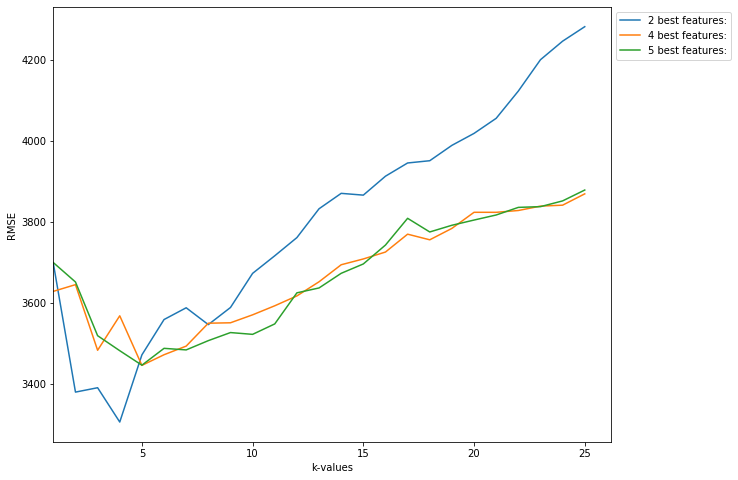

In [26]:
#visulization
fig=plt.figure(figsize=(10,8))
legend=[]
for k,v in k_rmse_results.items():
    x=list(v.keys())
    y=list(v.values())
    legend.append(k)
    
    plt.plot(x,y)
    plt.xlabel('k-values')
    plt.ylabel('RMSE')
    plt.xlim(1)
    plt.legend([k for k in k_rmse_results.keys()],bbox_to_anchor=(1, 1))

plt.show()

After use cross-validation, we can see the model become stable.

## Conclusion
In this project we tried to predict car prices from a relatively small dataset (approx 200 entries) containing various attributes.
we use K-Nearest Neighbors algorithm:
* We started by reading in our data and performing some cleaning
* Then, as part of the machine learning section, we trained simple models and progressively added more complexity to them by:
 * Selecting more features
 * Increasing the number of neighbors (k values)
 * Performing cross validation

We can find:

* `Feature Selection`: It is important to select the relevant features. We can see above that our best performing models had 2 important features.

* `Hyperparameter Optimization`: With a relatively small dataset with a lot of variance, we have seen that increasing knn values had the opposite effect i.e. increase in root mean squared error. This is to be expected because the number of categories in this dataset were relatively large as compared to the number of entries in that category. However, we obtained best results around a knn value of 4 and 5.

* `Data Splitting and Randomization`: The way the data is split between training and test sets or randomized can change results. It is impportant to carryout a multi-fold cross-validation in order to determine the best splitting strategy to reduce ordering bias as well as variance.